<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/main/plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.models import load_model
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [ ]:
### thay doi ti le anh tu 0->255 thanh 0->1
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
## lay du lieu tu google drive
train_data = train.flow_from_directory('/content/drive/MyDrive/data', target_size=(128,128), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/data_test', target_size=(128,128), class_mode='categorical')

Found 1190 images belonging to 6 classes.
Found 262 images belonging to 6 classes.


In [ ]:
## in ra cac thong tin lay duoc tu google drive
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

train_index : {'Corn_Common_Rust': 0, 'Corn_Gray_Leaf_Spot': 1, 'Corn_Healthy': 2, 'bean_healthy': 3, 'bean_leaf_spot': 4, 'bean_rust': 5}
test_index: {'Corn_Common_Rust': 0, 'Corn_Gray_leaf_spot': 1, 'Corn_Heathy': 2, 'bean_healthy': 3, 'bean_leaf_spot': 4, 'bean_rust': 5}


In [ ]:
model= Sequential()
## lop CNN1
model.add(Conv2D(64, kernel_size=(3,3), activation='linear',input_shape=(128,128,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN4
model.add(Conv2D(256,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
## lop CNN5
model.add(Conv2D(512,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

classes = 6

In [ ]:
# chuyen du lieu tu CNN ve ANN ( 2 chieu ve 1 chieu)
model.add(Flatten())
##lop hidden1
model.add(Dense(256,activation='linear'))
model.add(Dropout(0.5))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128,activation='linear'))
model.add(Dropout(0.5))
# lop output
model.add(Dense(classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

In [ ]:
## tien hanh train mo hinh
history=model.fit(train_data,epochs=25,batch_size=512,verbose=1, 
                  validation_data=test_data)

Epoch 1/25
38/38 [==============================] - 141s 4s/step - loss: 1.3942 - accuracy: 0.4076 - val_loss: 1.4975 - val_accuracy: 0.3779
Epoch 2/25
38/38 [==============================] - 136s 4s/step - loss: 1.1991 - accuracy: 0.5639 - val_loss: 1.2676 - val_accuracy: 0.5305
Epoch 3/25
38/38 [==============================] - 129s 3s/step - loss: 0.9980 - accuracy: 0.6328 - val_loss: 1.0559 - val_accuracy: 0.5954
Epoch 4/25
38/38 [==============================] - 128s 3s/step - loss: 0.8463 - accuracy: 0.6840 - val_loss: 0.9933 - val_accuracy: 0.6489
Epoch 5/25
38/38 [==============================] - 139s 4s/step - loss: 0.8166 - accuracy: 0.6975 - val_loss: 0.8689 - val_accuracy: 0.6450
Epoch 6/25
38/38 [==============================] - 135s 4s/step - loss: 0.7872 - accuracy: 0.7176 - val_loss: 0.7805 - val_accuracy: 0.6908
Epoch 7/25
38/38 [==============================] - 128s 3s/step - loss: 0.6331 - accuracy: 0.7613 - val_loss: 0.7611 - val_accuracy: 0.7061
Epoch 8/25
38

In [ ]:
## do chinh xac va chi so mat mat
value=model.evaluate(test_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

loss 0.6423370838165283
accuracy 0.8206107020378113


In [ ]:
## luu model
model.save('/content/drive/MyDrive/Colab Notebooks/modelfinalK3.h5')

1/1 [==============================] - 0s 315ms/step
Predicted:  Corn_Gray_Leaf_Spot


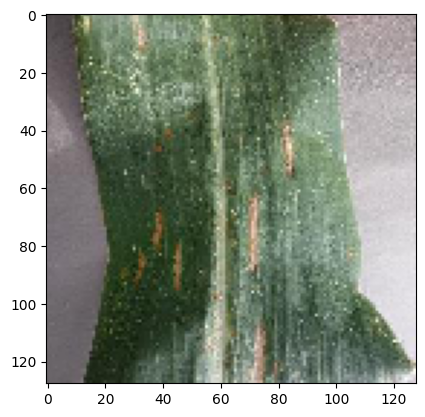

In [ ]:
## lay model tu google drive va tien hanh nhan dien
model = load_model('/content/drive/MyDrive/Colab Notebooks/modelfinalK3.h5')
name_foods=['Corn_Common_Rust', 'Corn_Gray_Leaf_Spot', 'Corn_Healthy', 'bean_healthy', 'bean_leaf_spot', 'bean_rust']
filePath = '/content/drive/MyDrive/data_test/Corn_Gray_leaf_spot/Corn_Gray_Spot (501).JPG'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_foods[pred])
plt.imshow(testImage)

1/1 [==============================] - 0s 217ms/step
Predicted:  đậu đốm lá


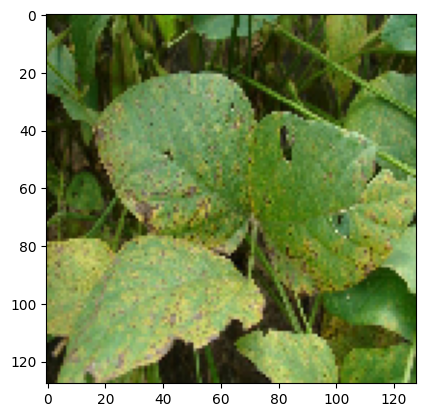

In [ ]:
## lay model tu google drive va tien hanh nhan dien
model = load_model('/content/drive/MyDrive/Colab Notebooks/modelfinalK3.h5')
name_foods=['ngô gỉ sắt', 'ngô đốm lá', 'ngô khỏe mạnh', 'đậu khỏe mạnh', 'đậu đốm lá', 'đậu gỉ sắt']
filePath = '/content/5470099.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred = int(np.argmax(model.predict(arrayImage)))
print("Predicted: ", name_foods[pred])
plt.imshow(testImage)

In [3]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=8298710be1deafeeeceab51df1d1bd85c30428292d39fb56eb7c0ebbc10cce3a
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
import streamlit as st
import time
import pandas as pd
import numpy as np
from keras.utils import load_img, img_to_array
from keras.models import load_model
from PIL import Image
col1,col2 = st.columns([1,2],gap="medium")
with col1:
    st.image("AIposter.png")
with col2:
    # app title
    st.title("CORN AND BEAN DISEASE DETECTION")
    st.header("Welcome !")
    # chọn ảnh
    img = st.file_uploader("Please choose your image")
    # mở ảnh
    st.image(img)
    # detect
    if not (img is None):
        
        model = load_model('C:/Users/USER/Downloads/modelfinalK3.h5')
        class_types = ['Corn common rust', 'Corn gray leaf spot', 'Corn healthy', 'Bean healthy', 'Bean leaf spot', 'Bean rust']
        testImage = load_img(img,  target_size=(128,128))
        arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
        pred = int(np.argmax(model.predict(arrayImage)))
        with st.spinner('Wait for it...'):
            time.sleep(5)
        st.write("Predicted: ",class_types[pred])